In [1]:
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 

# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 

# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


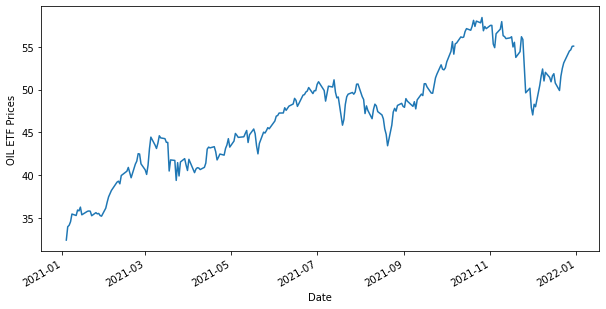

In [43]:
# Read data 
Df = yf.download('USO','2021-01-01','2021-12-31')

# Only keep close columns 
Df=Df[['Close']] 

# Drop rows with missing values 
Df= Df.dropna() 

# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("OIL ETF Prices")
plt.show()

In [44]:
# Define explanatory variables
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2021-01-15,35.980001,34.843333
2021-01-19,35.793334,35.172222
2021-01-20,35.776667,35.373333
2021-01-21,35.626667,35.560000
2021-01-22,35.766666,35.696667


In [45]:
# Define dependent variable
y = Df['Close']
y.head()


Date
2021-01-15    35.340000
2021-01-19    35.750000
2021-01-20    35.790001
2021-01-21    35.759998
2021-01-22    35.230000
Name: Close, dtype: float64

In [46]:
# Split the data into train and test dataset
t=.8 
t = int(t*len(Df)) 

# Train dataset 
X_train = X[:t] 
y_train = y[:t]  

# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [47]:
# Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C
# Gold ETF price = m1 * 3 days moving average + m2 * 15 days moving average + c
linear = LinearRegression().fit(X_train,y_train) 
print("MJ ETF Price =", round(linear.coef_[0],2), "* 3 Days Moving Average", round(linear.coef_[1],2), "* 9 Days Moving Average +", round(linear.intercept_,2))

MJ ETF Price = 1.03 * 3 Days Moving Average -0.03 * 9 Days Moving Average + 0.39


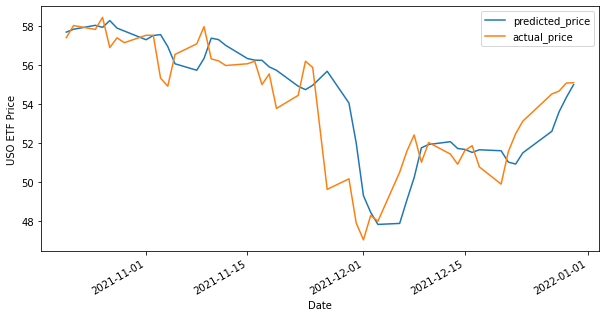

In [48]:
# Predicting the Oil ETF prices
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("USO ETF Price")  
plt.show()

In [49]:
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

71.11

In [50]:
Oil_stock = ['PBR', 'VALE', 'RIG', 'WLL']




In [51]:
start = '2021-01-01'
end = '2021-12-31'
df = yf.download(Oil_stock,start,end)


[*********************100%***********************]  4 of 4 completed


In [52]:
stocks = pd.DataFrame(df['Adj Close'])
stocks.head()

,PBR,RIG,VALE,WLL
Date,,,,
2021-01-04,9.085129,2.32,14.769797,26.520000
2021-01-05,9.353055,2.65,15.015962,26.879999
2021-01-06,9.434244,2.67,15.414915,26.980000
2021-01-07,9.491076,2.77,16.068523,26.450001
2021-01-08,9.491076,2.78,16.060034,26.120001


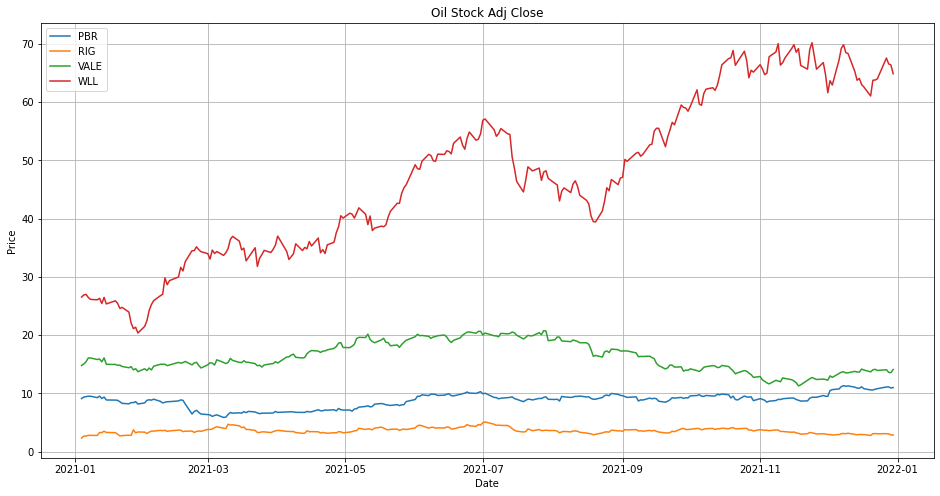

In [53]:
plt.figure(figsize=(16,8))
plt.plot(stocks)
plt.title('Oil Stock Adj Close')
plt.legend(stocks)
plt.grid()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()





<AxesSubplot:xlabel='Date'>

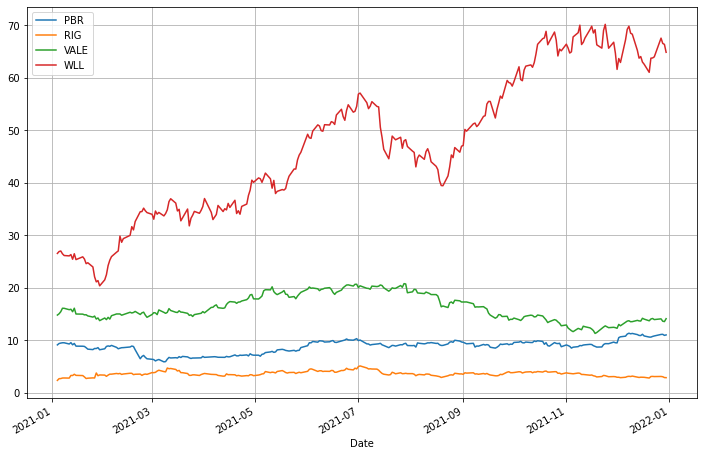

In [54]:
stocks.plot(grid = True, figsize=(12,8))


In [55]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()







,PBR,RIG,VALE,WLL
Date,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.029491,1.142241,1.016667,1.013575
2021-01-06,1.038427,1.150862,1.043678,1.017345
2021-01-07,1.044683,1.193966,1.087931,0.997360
2021-01-08,1.044683,1.198276,1.087356,0.984917


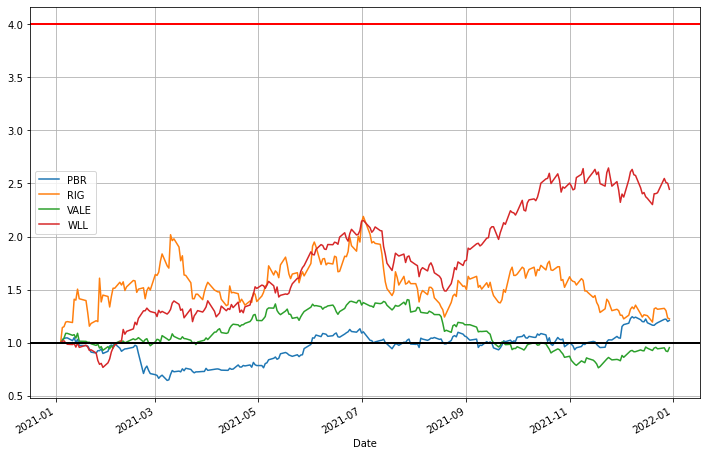

In [56]:
stock_return.plot(grid = True, figsize=(12,8)).axhline(y = 1, color = "black", lw = 2)
plt.axhline(y=4, color = 'red', lw=2)

In [57]:
stock_return = stocks.pct_change(1).dropna()
stock_return.head()

,PBR,RIG,VALE,WLL
Date,,,,
2021-01-05,0.029491,0.142241,0.016667,0.013575
2021-01-06,0.008680,0.007547,0.026569,0.003720
2021-01-07,0.006024,0.037453,0.042401,-0.019644
2021-01-08,0.000000,0.003610,-0.000528,-0.012476
2021-01-11,-0.024807,-0.007194,-0.016385,-0.002680


In [58]:
stock_return.tail()







,PBR,RIG,VALE,WLL
Date,,,,
2021-12-23,0.008411,-0.009740,-0.014873,0.003293
2021-12-27,0.026877,0.006557,0.010065,0.055799
2021-12-28,0.001805,-0.016287,-0.032028,-0.014952
2021-12-29,-0.018018,-0.052980,-0.005147,-0.002705
2021-12-30,0.008257,-0.006993,0.040650,-0.022755


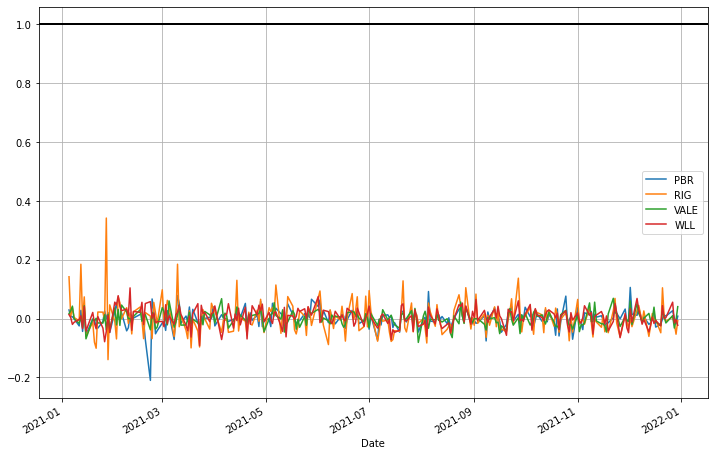

In [59]:
stock_return.plot(grid = True, figsize=(12,8)).axhline(y = 1, color = "black", lw = 2)


In [60]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,PBR,RIG,VALE,WLL
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.029064,0.132993,0.016529,0.013483
2021-01-06,0.008643,0.007519,0.026222,0.003713
2021-01-07,0.006006,0.036769,0.041527,-0.019840
2021-01-08,0.000000,0.003604,-0.000528,-0.012555


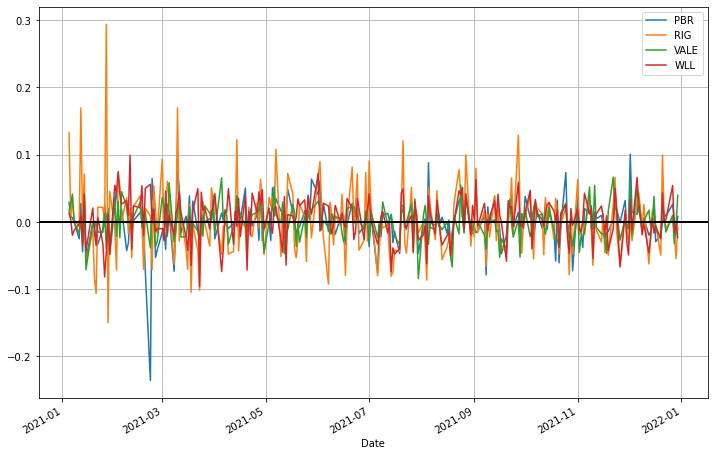

In [61]:
stock_change.plot(grid = True, figsize=(12,8)).axhline(y = 0, color = "black", lw = 2)


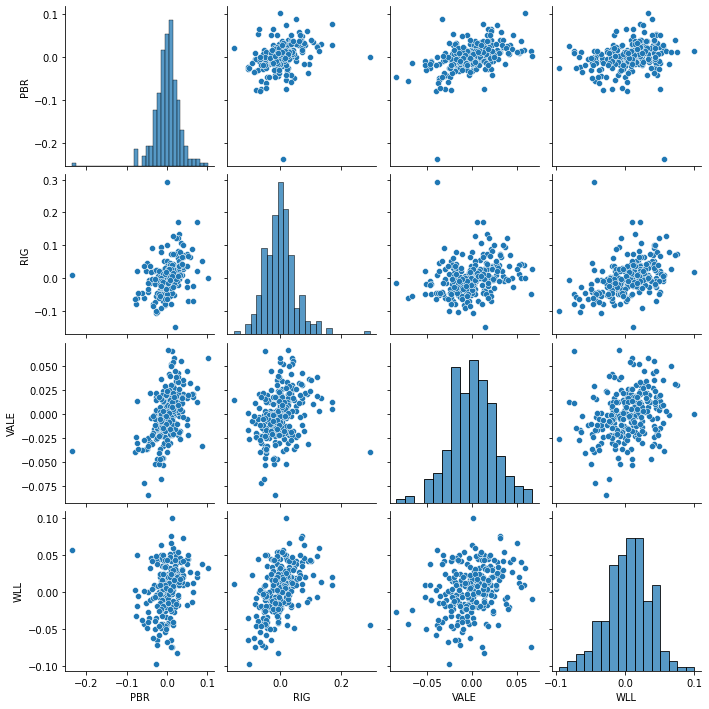

In [62]:
sns.pairplot(stock_change[1:])


In [65]:
stock_change.idxmin()


PBR    2021-02-22
RIG    2021-01-28
VALE   2021-07-30
WLL    2021-03-23
dtype: datetime64[ns]

In [67]:
stock_change.idxmax()


PBR    2021-12-02
RIG    2021-01-27
VALE   2021-11-22
WLL    2021-02-10
dtype: datetime64[ns]

In [68]:
stock_change.std()



PBR     0.031482
RIG     0.051375
VALE    0.024759
WLL     0.031677
dtype: float64

In [69]:
# Sharpe Ratio for Each Stocks
N = 252
returns = stocks.pct_change().dropna()
annualised_sharpe = np.sqrt(N) * returns.mean() / returns.std()
annualised_sharpe

PBR     0.642539
RIG     0.643114
VALE    0.073018
WLL     2.046384
dtype: float64

In [70]:
annualised_sharpe.index


Index(['PBR', 'RIG', 'VALE', 'WLL'], dtype='object')

In [71]:
annualised_sharpe.sort_values()


VALE    0.073018
PBR     0.642539
RIG     0.643114
WLL     2.046384
dtype: float64

In [72]:
annualised_sharpe.sort_index()


PBR     0.642539
RIG     0.643114
VALE    0.073018
WLL     2.046384
dtype: float64

In [73]:
# Equity Sharpe - Buy and Hold
N = 252 # Number of trading in a year
risk = 0.01
excess_daily_ret =  returns - (risk * N)
equity_sharpe = np.sqrt(N) * excess_daily_ret.mean() / excess_daily_ret.std()
equity_sharpe.sort_values()

VALE   -1615.966603
PBR    -1296.827351
WLL    -1260.880660
RIG     -752.822351
dtype: float64

In [74]:
# Market Neutral Sharpe
start = '2021-01-01'
end = '2021-12-31'
market = 'SPY'
ticker = ['PBR', 'VALE', 'RIG', 'WLL']
bench = yf.download(market,start,end)
stocks = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


In [75]:
tick = pd.DataFrame(stocks['Adj Close'])
tick.head()

,PBR,RIG,VALE,WLL
Date,,,,
2021-01-04,9.085128,2.32,14.769796,26.520000
2021-01-05,9.353055,2.65,15.015961,26.879999
2021-01-06,9.434243,2.67,15.414915,26.980000
2021-01-07,9.491076,2.77,16.068521,26.450001
2021-01-08,9.491076,2.78,16.060032,26.120001


In [76]:
daily_rets = tick.pct_change().dropna()
daily_rets.head()

,PBR,RIG,VALE,WLL
Date,,,,
2021-01-05,0.029491,0.142241,0.016667,0.013575
2021-01-06,0.008680,0.007547,0.026569,0.003720
2021-01-07,0.006024,0.037453,0.042401,-0.019644
2021-01-08,0.000000,0.003610,-0.000528,-0.012476
2021-01-11,-0.024807,-0.007194,-0.016385,-0.002680


In [77]:
bench_rets = bench['Adj Close'].pct_change().dropna()
bench_rets.head()

Date
2021-01-05    0.006887
2021-01-06    0.005979
2021-01-07    0.014857
2021-01-08    0.005698
2021-01-11   -0.006741
Name: Adj Close, dtype: float64

In [78]:
strat = (daily_rets.sub(bench_rets, axis=0))/2
strat.head()

,PBR,RIG,VALE,WLL
Date,,,,
2021-01-05,0.011302,0.067677,0.004890,0.003344
2021-01-06,0.001351,0.000784,0.010295,-0.001129
2021-01-07,-0.004417,0.011298,0.013772,-0.017251
2021-01-08,-0.002849,-0.001044,-0.003113,-0.009087
2021-01-11,-0.009033,-0.000227,-0.004822,0.002030


In [79]:
N = 252
market_neutral_sharpe = np.sqrt(N) * strat.mean() / strat.std()
market_neutral_sharpe.sort_values()


VALE   -0.688324
PBR     0.075865
RIG     0.314045
WLL     1.596976
dtype: float64